In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2'	,'Unnamed: 3'	,'Unnamed: 4'],inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.rename(columns={'v1':'output', 'v2':'mail'}, inplace=True)

In [9]:
df.head()

,output,mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encode= LabelEncoder()

In [11]:
df['output']=encode.fit_transform(df['output'])

In [12]:
df.head()

,output,mail
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

output    0
mail      0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

In [17]:
####EDA

In [18]:
import matplotlib.pyplot as plt

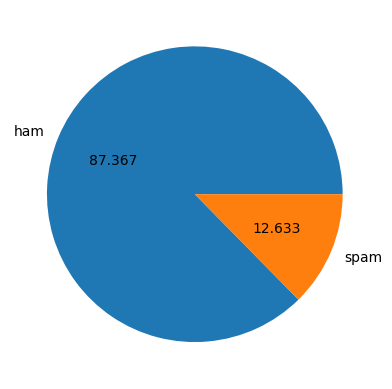

In [19]:
plt.pie(df['output'].value_counts(), labels=['ham','spam'], autopct ='%0.3f')
plt.show()

In [20]:
##data is im balanced

In [21]:
import nltk
nltk.data.path.append("C:/Users/Mr/AppData/Roaming/nltk_data")

In [22]:
df['no_char']=df['mail'].apply(len)

In [23]:
from nltk.tokenize import wordpunct_tokenize
df['no_words']=df['mail'].apply(lambda x: len(wordpunct_tokenize(x)))

In [24]:

from nltk.tokenize import PunktSentenceTokenizer
tokenizer = PunktSentenceTokenizer()
df['no_sentences'] = df['mail'].apply(lambda x: len(tokenizer.tokenize(x)))

In [25]:
df.head()

,output,mail,no_char,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,1
1,0,Ok lar... Joking wif u oni...,29,8,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [26]:
df.describe()

,output,no_char,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,19.202747,1.919714
std,0.332253,58.236293,13.963696,1.428215
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,28.000000,2.000000
max,1.000000,910.000000,210.000000,38.000000


In [27]:
df[df['output']==0][['no_char','no_words','no_sentences']].describe()

,no_char,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.448627,1.767715
std,56.358207,13.769106,1.353829
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,210.000000,38.000000


In [28]:
df[df['output']==1][['no_char','no_words','no_sentences']].describe()

,no_char,no_words,no_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,31.333844,2.970904
std,30.137753,7.997049,1.486363
min,13.000000,2.000000,1.000000
25%,132.000000,28.000000,2.000000
50%,149.000000,33.000000,3.000000
75%,157.000000,36.000000,4.000000
max,224.000000,49.000000,9.000000


<Axes: xlabel='no_char', ylabel='Count'>

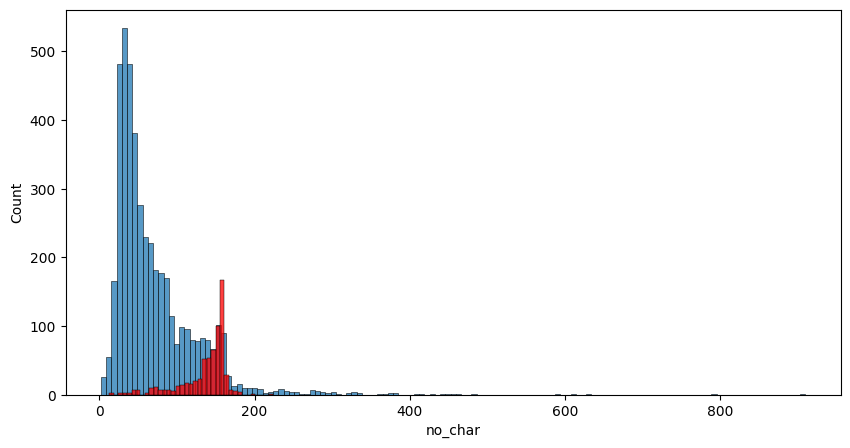

In [29]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df[df['output']==0]['no_char'])
sns.histplot(df[df['output']==1]['no_char'], color='red')

<Axes: xlabel='no_words', ylabel='Count'>

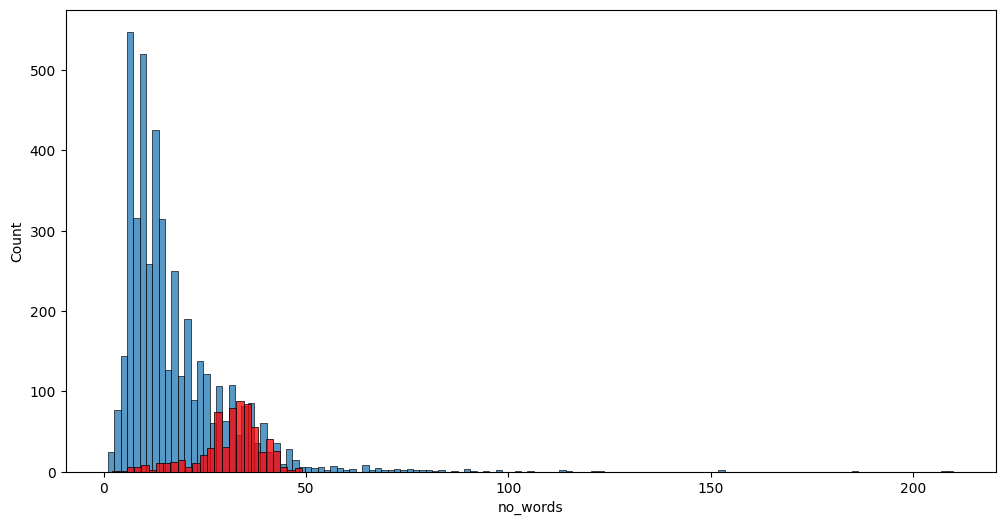

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['output'] == 0]['no_words'])
sns.histplot(df[df['output'] == 1]['no_words'],color='red')

<Axes: >

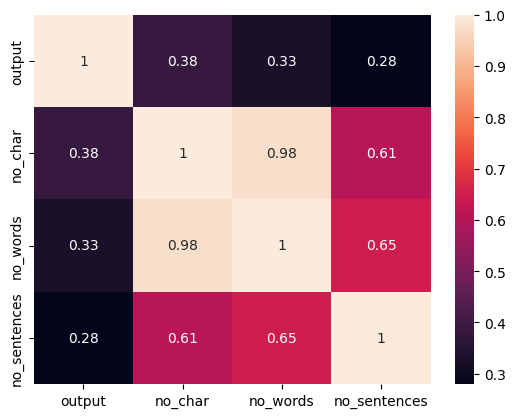

In [31]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

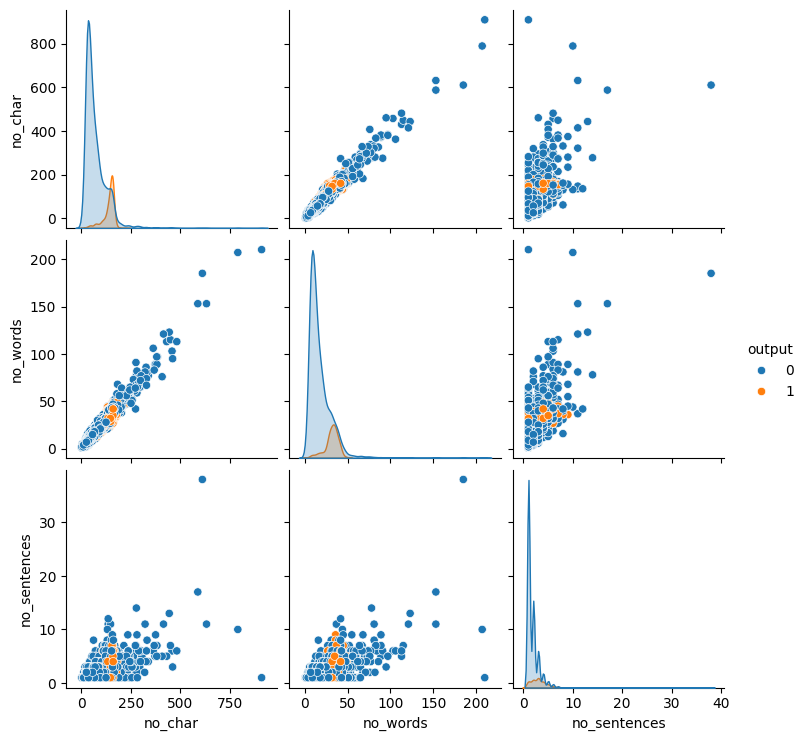

In [32]:
sns.pairplot(df,hue='output')

In [33]:
##Data preprocessing


In [34]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(mail):
    mail=mail.lower()
    mail=nltk.wordpunct_tokenize(mail)
    y=[]
    for i in mail:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)  
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [35]:
transform_text("CRYING SOO HARD THEY BEEN LEAVING ME")

'cri soo hard leav'

In [36]:
df['transformed_text'] = df['mail'].apply(transform_text)
df.head()

,output,mail,no_char,no_words,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=800,min_font_size=10,background_color='white')

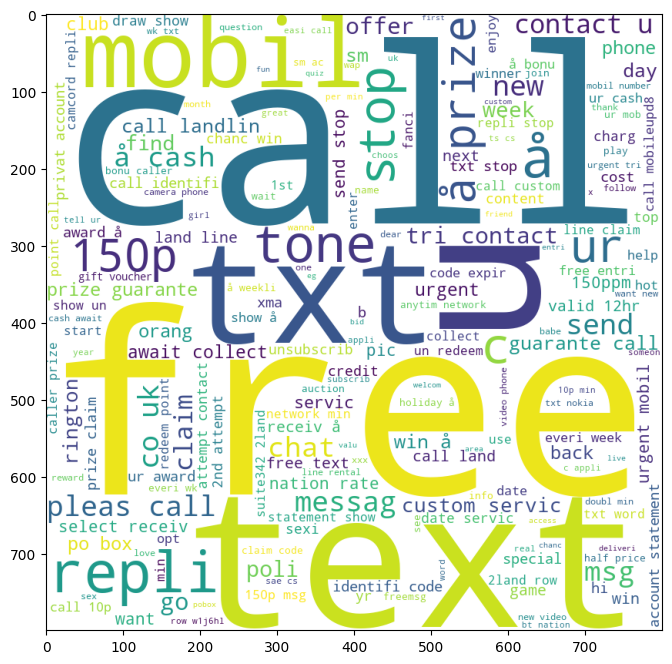

In [38]:
spam_wc = wc.generate(df[df['output'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(spam_wc)

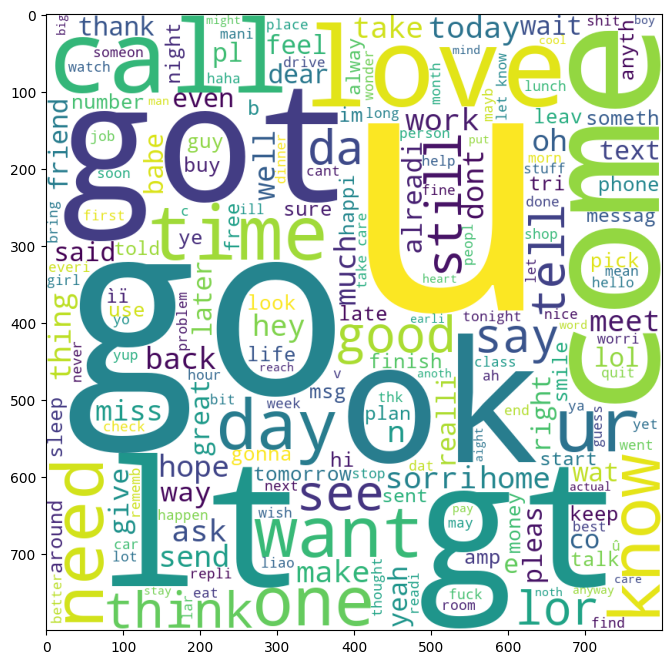

In [39]:
ham_wc = wc.generate(df[df['output'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(ham_wc)

In [40]:
spam_corpus = []
for msg in df[df['output'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
len(spam_corpus)

11993

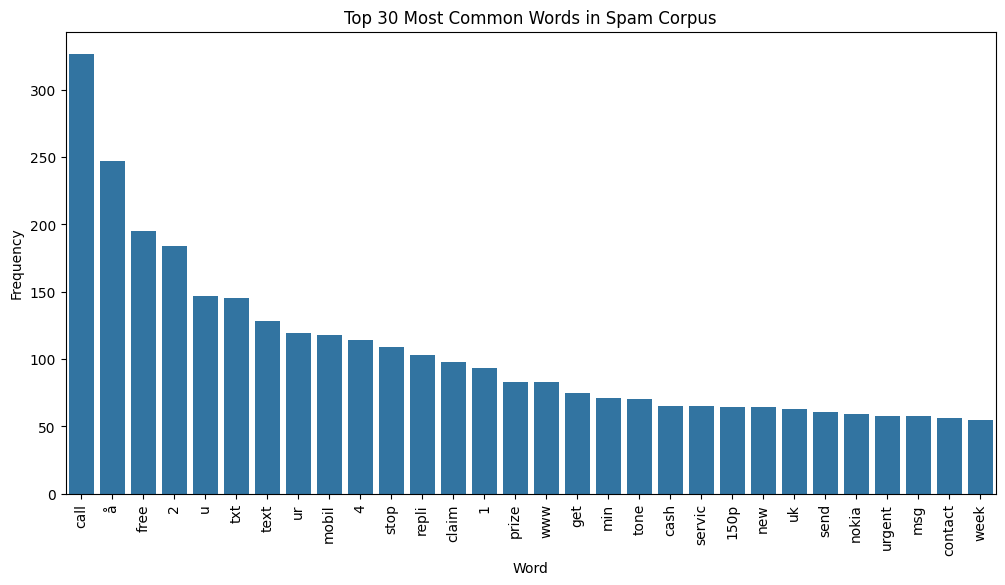

In [42]:
from collections import Counter
top_words = Counter(spam_corpus).most_common(30)
cf=pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Frequency', data=cf)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['output'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

36368

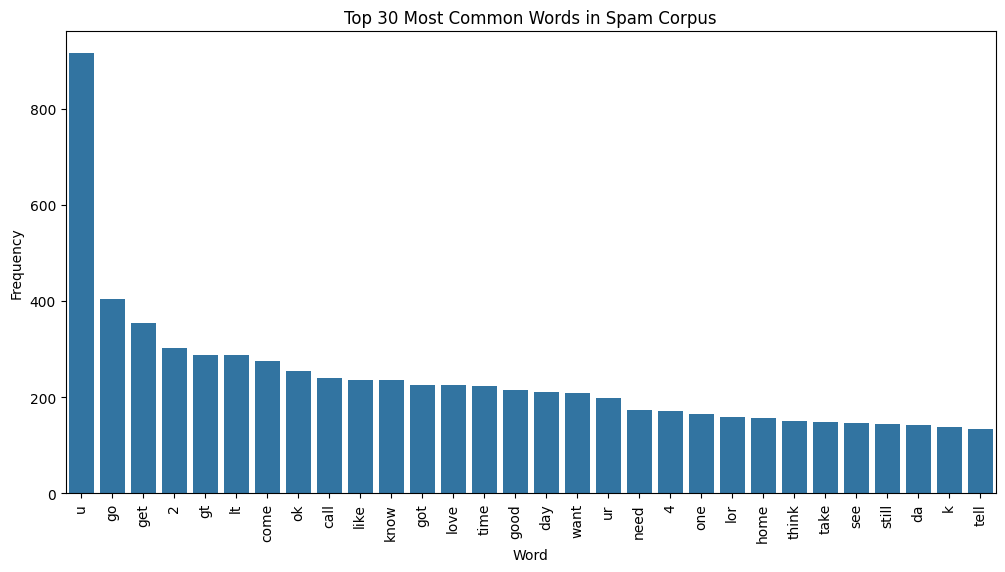

In [45]:
top_words = Counter(ham_corpus).most_common(30)
cf=pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Frequency', data=cf)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()

In [46]:
#MODEL BUILD

# Text Vectorization
# using Bag of Words
df.head()

,output,mail,no_char,no_words,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,1,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [48]:
x= tfidf.fit_transform(df['transformed_text']).toarray()
y=df['output'].values

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [50]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[788 108]
 [ 20 118]]
0.5221238938053098


In [53]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [54]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt}

In [57]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)   
    return accuracy,precision

In [58]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9874274661508704
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8301886792452831
For  LR
Accuracy -  0.960348162475822
Precision -  0.9619047619047619
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9661016949152542
For  AdaBoost
Accuracy -  0.9235976789168279
Precision -  0.8641975308641975
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8636363636363636
For  ETC
Accuracy -  0.9816247582205029
Precision -  0.968503937007874
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9489795918367347


In [64]:
perform_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
print(perform_df)
perform_df1 = pd.melt(perform_df, id_vars = "Algorithm")
perform_df1

  Algorithm  Accuracy  Precision
1        KN  0.905222   1.000000
2        NB  0.987427   1.000000
0       SVC  0.975822   0.974790
8       ETC  0.981625   0.968504
5        RF  0.972921   0.966102
4        LR  0.960348   0.961905
9      GBDT  0.951644   0.948980
6  AdaBoost  0.923598   0.864198
7       BgC  0.959381   0.863636
3        DT  0.934236   0.830189


,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.987427
2,SVC,Accuracy,0.975822
3,ETC,Accuracy,0.981625
4,RF,Accuracy,0.972921
5,LR,Accuracy,0.960348
6,GBDT,Accuracy,0.951644
7,AdaBoost,Accuracy,0.923598
8,BgC,Accuracy,0.959381
9,DT,Accuracy,0.934236


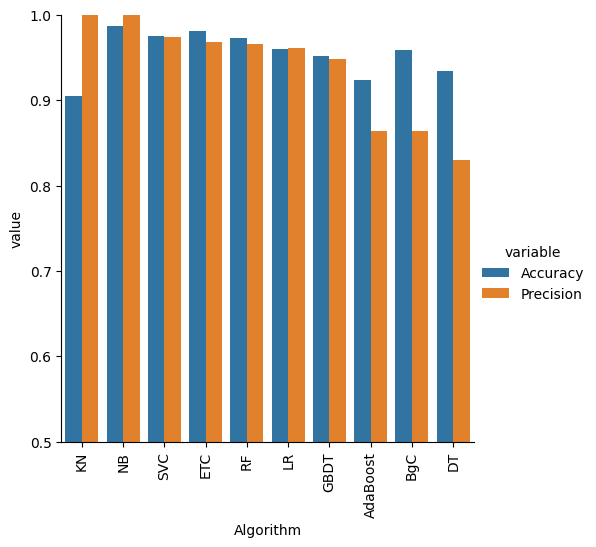

In [66]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=perform_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))